In [4]:
# !pip install seaborn

In [5]:
from datetime import date, timedelta
import gc
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load true target values

In [7]:
file_path = '../derived_datasets/'

In [8]:
df_true = pd.read_csv(file_path + 'df_true.csv',index_col=['store_nbr', 'item_nbr'])

In [9]:
df_true.columns = pd.to_datetime(df_true.columns)

In [10]:
df_true.head()

2017-05-01  2017-05-02  2017-05-03  2017-05-04  \
store_nbr item_nbr                                                   
1         96995       0.000000    0.000000    0.000000    0.000000   
          99197       0.000000    0.000000    0.000000    0.000000   
          103520      0.693147    1.791759    2.302585    1.609438   
          103665      0.000000    0.693147    1.098612    1.609438   
          105574      1.609438    1.098612    2.397895    2.302585   

                    2017-05-05  2017-05-06  2017-05-07  2017-05-08  \
store_nbr item_nbr                                                   
1         96995       0.000000    0.000000    0.000000    0.693147   
          99197       0.000000    0.000000    0.000000    0.000000   
          103520      0.693147    0.000000    0.693147    1.098612   
          103665      0.693147    1.791759    0.000000    1.098612   
          105574      2.197225    1.609438    1.386294    2.772589   

                    2017-05-09  2017-05-10     ...      2017-08-06  \
store_nbr item_nbr                             ...                   
1         96995       0.693147    0.000000     ...        1.098612   
          99197       0.000000    0.693147     ...        0.000000   
          103520      0.693147    0.000000     ...        0.000000   
          103665      1.609438    0.000000     ...        0.693147   
          105574      2.079442    2.564949     ...        0.000000   

                    2017-08-07  2017-08-08  2017-08-09  2017-08-10  \
store_nbr item_nbr                                                   
1         96995       1.098612    0.000000    0.000000    0.693147   
          99197       1.098612    0.000000    1.098612    0.000000   
          103520      0.000000    1.386294    0.000000    1.386294   
          103665      1.098612    0.000000    2.079442    2.302585   
          105574      1.791759    2.079442    1.945910    2.397895   

                    2017-08-11  2017-08-12  2017-08-13  2017-08-14  2017-08-15  
store_nbr item_nbr                                                              
1         96995       0.000000    0.000000    0.000000    0.000000    0.000000  
          99197       0.000000    0.000000    0.000000    0.000000    0.000000  
          103520      0.693147    0.693147    0.693147    0.000000    0.000000  
          103665      1.098612    0.000000    0.000000    0.693147    0.693147  
          105574      1.791759    1.791759    0.000000    1.386294    1.609438  

[5 rows x 107 columns]

In [11]:
# from 2017-05-01 to 2017-08-15
df_true.shape

(167515, 107)

### Load LGBM predicted data

In [14]:
model_output_path = '../model_results/2020-01-08/'

In [15]:
#lgbm best model
file_name = "lgbm_test_pred_model_10.csv"

df_pred_lgbm = pd.read_csv(model_output_path + file_name, parse_dates=True, index_col = ['store_nbr','item_nbr'])

In [16]:
df_pred_lgbm.columns = pd.to_datetime(df_pred_lgbm.columns)

In [17]:
df_pred_lgbm.head()

2017-08-01  2017-08-02  2017-08-03  2017-08-04  \
store_nbr item_nbr                                                   
1         96995       0.227418    0.237613    0.237575    0.270848   
          99197       0.301238    0.350765    0.348442    0.417483   
          103520      0.834970    0.971372    0.995478    0.946459   
          103665      0.970065    1.074050    0.926808    1.250704   
          105574      1.864948    1.999937    1.797392    1.982403   

                    2017-08-05  2017-08-06  2017-08-07  2017-08-08  \
store_nbr item_nbr                                                   
1         96995       0.272078    0.238347    0.214660    0.192149   
          99197       0.448616    0.263063    0.368472    0.364301   
          103520      0.899681    0.327537    0.808253    0.806969   
          103665      1.277994    0.657086    0.939410    0.942037   
          105574      1.723769    0.861388    1.910205    1.893428   

                    2017-08-09  2017-08-10  2017-08-11  2017-08-12  \
store_nbr item_nbr                                                   
1         96995       0.218895    0.184399    0.219494    0.272419   
          99197       0.391670    0.349459    0.433089    0.450842   
          103520      0.931603    0.937187    0.953335    0.923489   
          103665      0.991554    0.891851    1.201627    1.256601   
          105574      1.980459    1.718276    1.908548    1.675437   

                    2017-08-13  2017-08-14  2017-08-15  
store_nbr item_nbr                                      
1         96995       0.214160    0.203463    0.192818  
          99197       0.310381    0.358754    0.372684  
          103520      0.417168    0.800708    0.822078  
          103665      0.696682    0.923226    0.919987  
          105574      0.959834    1.852875    1.843765

### Load NN predicted Data

In [18]:
#lgbm best model
file_name = "nn_test_pred_model_3.csv"

df_pred_nn = pd.read_csv(model_output_path + file_name, parse_dates=True, index_col = ['store_nbr','item_nbr'])

In [19]:
df_pred_nn.columns = pd.to_datetime(df_pred_nn.columns)

In [20]:
df_pred_nn.head()

2017-08-01  2017-08-02  2017-08-03  2017-08-04  \
store_nbr item_nbr                                                   
1         96995       0.391581    0.209052    0.226652    0.304516   
          99197       0.328909    0.413830    0.320864    0.461011   
          103520      0.586979    0.807505    1.030770    0.961547   
          103665      0.829450    1.031238    0.942085    1.325397   
          105574      1.775749    1.886632    1.699130    1.902708   

                    2017-08-05  2017-08-06  2017-08-07  2017-08-08  \
store_nbr item_nbr                                                   
1         96995       0.407376    0.215881    0.227515    0.276475   
          99197       0.261865    0.284506    0.285279    0.605100   
          103520      0.908442    0.447025    0.808814    0.750800   
          103665      1.239385    0.873415    0.927507    0.858822   
          105574      1.555897    0.724920    2.022219    1.976643   

                    2017-08-09  2017-08-10  2017-08-11  2017-08-12  \
store_nbr item_nbr                                                   
1         96995       0.251711    0.014294    0.381685    0.177744   
          99197       0.442220    0.225764    0.301877    0.368843   
          103520      0.888935    0.918330    0.874513    0.880514   
          103665      0.937127    0.923399    1.247966    1.355312   
          105574      1.799260    1.739859    1.717979    1.626529   

                    2017-08-13  2017-08-14  2017-08-15  
store_nbr item_nbr                                      
1         96995       0.287225    0.195226    0.244835  
          99197       0.182884    0.284901    0.433479  
          103520      0.432935    0.765987    0.785381  
          103665      0.894275    0.924026    0.945993  
          105574      0.840655    1.853584    1.747560

In [21]:
df_pred_nn.shape

(167515, 15)

### load items file get items weight

In [22]:
items = pd.read_csv('../input/items.csv', index_col = 'item_nbr')

# Create for graphing use
item_family_dict = {k:v for k, v in items.family.iteritems()}

In [23]:
items = items.reindex(df_true.index.get_level_values(1))

In [24]:
weights = (items.perishable * 0.25 + 1).values
weights = weights.reshape(weights.shape[0],1)
weights.shape

(167515, 1)

### Calculate NWRMSLE for LGBM test predictions

In [25]:
df_error_temp = np.power(df_true[pd.date_range('2017-08-01','2017-08-15')] - df_pred_lgbm,2)
df_error_temp = df_error_temp.values * weights
print(f'LGBM test NWRMSLE: {np.sqrt(df_error_temp.sum().sum()/weights.sum()/15)}')

del df_error_temp; gc.collect()

LGBM test NWRMSLE: 0.5966427724106863


58

### Calculate NWRMSLE for NN test predictions (double check)

In [41]:
df_error_temp = np.power(df_true[pd.date_range('2017-08-01','2017-08-15')] - df_pred_nn,2)
df_error_temp = df_error_temp.values * weights
print(f'NN test NWRMSLE: {np.sqrt(df_error_temp.sum().sum()/weights.sum()/15)}')

del df_error_temp; gc.collect()

NN test NWRMSLE: 0.6222278625954616


27314

### Calculate MAE for LGBM and NN Models

In [27]:
df_mae_lgbm = np.abs(np.expm1(df_true[pd.date_range('2017-08-01','2017-08-15')]) - np.expm1(df_pred_lgbm)).mean(axis=1)
df_mae_lgbm = pd.DataFrame(df_mae_lgbm, columns = ['mae'])
df_mae_lgbm.reset_index(-1,inplace=True)
df_mae_lgbm['family'] = df_mae_lgbm['item_nbr'].apply(lambda x: item_family_dict[x])
df_mae_lgbm.reset_index(inplace=True)
df_mae_lgbm.set_index(['store_nbr', 'item_nbr'],inplace=True)
df_mae_lgbm = df_mae_lgbm.sort_values(by = 'mae', ascending=False)

In [28]:
df_mae_nn = np.abs(np.expm1(df_true[pd.date_range('2017-08-01','2017-08-15')]) - np.expm1(df_pred_nn)).mean(axis=1)
df_mae_nn = pd.DataFrame(df_mae_nn, columns = ['mae'])
df_mae_nn.reset_index(-1,inplace=True)
df_mae_nn['family'] = df_mae_nn['item_nbr'].apply(lambda x: item_family_dict[x])
df_mae_nn.reset_index(inplace=True)
df_mae_nn.set_index(['store_nbr', 'item_nbr'],inplace=True)
df_mae_nn = df_mae_nn.sort_values(by = 'mae', ascending=False)

In [ ]:
df_mae_lgbm.head()

In [ ]:
df_mae_nn.head()

In [29]:
# PRODUCE with highest MAE for LGBM model 
df_mae_lgbm[df_mae_lgbm.family == 'PRODUCE'].iloc[[0]]

,,mae,family
store_nbr,item_nbr,,
44,1503844,296.185611,PRODUCE


In [30]:
# BEVERAGES with highest MAE  for LGBM model
df_mae_lgbm[df_mae_lgbm.family == 'BEVERAGES'].iloc[[0]]

,,mae,family
store_nbr,item_nbr,,
54,2013931,883.451471,BEVERAGES


In [31]:
# GROCERY I with highest MAE for LGBM model
df_mae_lgbm[df_mae_lgbm.family == 'GROCERY I'].iloc[[0]]

,,mae,family
store_nbr,item_nbr,,
20,841842,505.019101,GROCERY I


### Prediction error for LGBM & NN models 
#### (positive means overprediction, negative means underprediction)

In [32]:
df_error_lgbm = np.expm1(df_pred_lgbm) - np.expm1(df_true[pd.date_range('2017-08-01','2017-08-15')])

In [33]:
df_error_lgbm.head()

2017-08-01  2017-08-02  2017-08-03  2017-08-04  \
store_nbr item_nbr                                                   
1         96995       0.255355   -0.731782   -1.731831    0.311075   
          99197       0.351531    0.420154    0.416858    0.518136   
          103520     -1.695254    0.641566   -0.293982   -1.423430   
          103665     -2.361883   -0.072788   -0.473567   -5.507198   
          105574     -2.544401   -1.611409   -0.966110    1.260165   

                    2017-08-05  2017-08-06  2017-08-07  2017-08-08  \
store_nbr item_nbr                                                   
1         96995       0.312689   -1.730850   -1.760560    0.211851   
          99197      -0.433857    0.300909   -1.554476    0.439507   
          103520      1.458819    0.387547    1.243984   -1.758894   
          103665     -0.410568   -0.070838   -0.441528    1.565201   
          105574     -2.394384    1.366443    0.754475   -1.357903   

                    2017-08-09  2017-08-10  2017-08-11  2017-08-12  \
store_nbr item_nbr                                                   
1         96995       0.244700   -0.797505    0.245447    0.313137   
          99197      -1.520551    0.418300    0.542013    0.569634   
          103520      1.538576   -1.447209    0.594348    0.518062   
          103665     -5.304581   -7.560358    0.325524    2.513458   
          105574      0.246065   -5.425091    0.743290   -0.658869   

                    2017-08-13  2017-08-14  2017-08-15  
store_nbr item_nbr                                      
1         96995       0.238821    0.225639    0.212662  
          99197       0.363945    0.431545    0.451626  
          103520     -0.482342    1.227117    1.275224  
          103665      1.007082    0.517400    0.509259  
          105574      1.611263    2.378127    1.320291

In [34]:
df_error_nn = np.expm1(df_pred_nn) - np.expm1(df_true[pd.date_range('2017-08-01','2017-08-15')])

### Plot sales forecasting for selected items

In [35]:
# Create plot function
def item_prediction_plot(store_nbr, item_nbr, fig_number = None):
    store_nbr =store_nbr
    item_nbr = item_nbr

    temp_dict = {'Actual': np.expm1(df_true.loc[(store_nbr,item_nbr)]),
                 'LGBM': np.expm1(df_pred_lgbm.loc[(store_nbr,item_nbr)]),
                 'NN': np.expm1(df_pred_nn.loc[(store_nbr,item_nbr)])}

    temp_df = pd.DataFrame(temp_dict)

    temp_df['Actual'].plot(color='black')
    temp_df['LGBM'].plot(color='royalblue')
    temp_df['NN'].plot(color='orange')

    plt.legend()
    plt.ylabel('Unit Sales')
    if fig_number == None:
        plt.title(f'Store #{store_nbr} | Item #{item_nbr} | Family: {item_family_dict[item_nbr]}')
    else:
        plt.title(f'{fig_number} Store #{store_nbr} | Item #{item_nbr} | Family: {item_family_dict[item_nbr]}')

In [38]:
out_path = '../final_report/figures/update_2020-01-08/'

In [52]:
#store_item_list = [(44,314384),(45, 1004551),(54, 2013931),(22, 841842)]
store_item_list = [(45,314384),(44, 1004551),(54, 2013931),(22, 841842)]
fig_number_list = list('abcd')

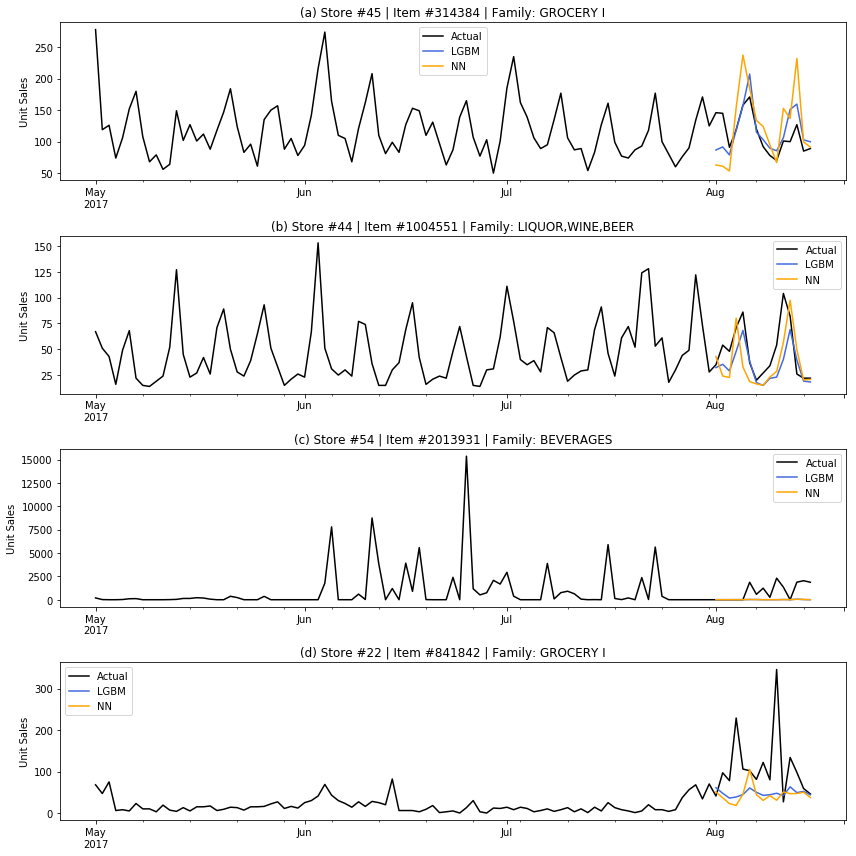

In [45]:
plt.figure(figsize=(12,12))
for i, j in enumerate(zip(store_item_list, fig_number_list),1):
    plt.subplot(4,1,i)
    item_prediction_plot(j[0][0], j[0][1], f'({j[1]})')
plt.tight_layout()
plt.savefig(out_path + 'items_pred_sales.png')


### MAE and Max & Min Errors

In [56]:
store_item_list

[(45, 314384), (44, 1004551), (54, 2013931), (22, 841842)]

In [53]:
for store_nbr, item_nbr in store_item_list:  
    print(store_nbr, item_nbr, df_mae_lgbm.loc[store_nbr].loc[item_nbr]['mae'])

45 314384 21.541299854470868
44 1004551 15.7841045728999
54 2013931 883.4514711751874
22 841842 66.2147229502991


In [54]:
for store_nbr, item_nbr in store_item_list:  
    print(store_nbr, item_nbr, df_mae_nn.loc[store_nbr].loc[item_nbr]['mae'])

45 314384 40.65283916158321
44 1004551 18.984162796244085
54 2013931 883.6500150823643
22 841842 70.78270374409041


In [55]:
for store_nbr, item_nbr in store_item_list:  
    print(store_nbr, item_nbr, df_error_lgbm.loc[store_nbr].loc[item_nbr].max(), df_error_lgbm.loc[store_nbr].loc[item_nbr].min())

45 314384 51.212094251034245 -59.25099623663857
44 1004551 13.505402352007625 -63.79376252152899
54 2013931 7.088316842403084 -2307.8354191244066
22 841842 19.91341780432112 -298.337828428518


In [57]:
for store_nbr, item_nbr in store_item_list:  
    print(store_nbr, item_nbr, df_error_nn.loc[store_nbr].loc[item_nbr].max(), df_error_nn.loc[store_nbr].loc[item_nbr].min())

45 314384 105.25796801966561 -83.97949848392838
44 1004551 23.541622260974744 -53.196112860625895
54 2013931 7.83661866926829 -2307.1724751999095
22 841842 23.850387078518263 -315.13162623454764


### Feature Importance

In [46]:
feature_importance = pd.read_csv(model_output_path + 'lgbm_feature_importance_model_10.csv', index_col = [0])

In [47]:
feature_importance.head()

,2017-08-01,2017-08-02,2017-08-03,2017-08-04,2017-08-05,2017-08-06,2017-08-07,2017-08-08,2017-08-09,2017-08-10,2017-08-11,2017-08-12,2017-08-13,2017-08-14,2017-08-15
promo_7,2467.279383,2229.198052,627.718829,947.586537,908.146345,1964.435022,13045.179199,396901.195524,11972.269393,1392.294677,1036.676698,380.527781,207.364759,458.442551,7137.711559
promo_14,558.953969,1021.004609,284.004247,497.750140,885.579133,713.636952,493.944330,7087.348133,2298.399847,1858.251124,2390.502822,3562.435143,5117.076700,22673.957062,332031.987309
promo_30,7187.222721,10200.117396,9346.100422,12572.155280,10186.507702,13865.460423,12588.138373,13008.897815,16444.721596,14519.419442,18097.825642,18694.303226,21431.916447,20435.209132,17560.078090
promo_3_aft,3522.146049,15782.528178,24542.012053,13202.373399,6021.875534,6834.753333,3311.304382,4046.139620,2826.483894,1639.994407,1526.445440,1292.135646,1291.415937,961.983160,1800.185961
promo_7_aft,4948.771371,7278.295362,20451.521058,49219.437848,56347.062796,54106.798137,58450.655399,51417.631144,11801.319269,4752.260529,3055.410591,5147.059569,3929.892795,3089.775498,2530.066288


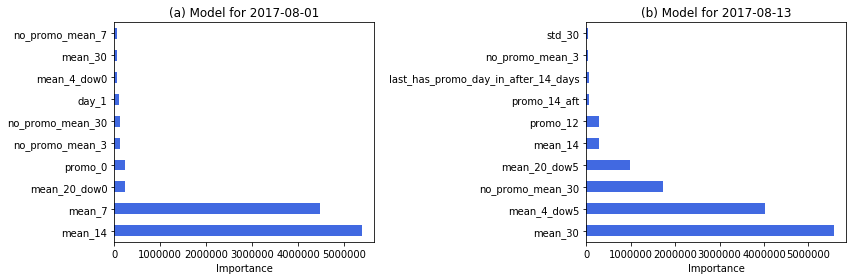

In [48]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
df_temp = feature_importance['2017-08-01'].sort_values(ascending=False)[:10]
df_temp.plot.barh(color='royalblue')
plt.xlabel('Importance')
plt.title('(a) Model for 2017-08-01')
plt.subplot(1,2,2)
df_temp = feature_importance['2017-08-13'].sort_values(ascending=False)[:10]
df_temp.plot.barh(color='royalblue')
plt.xlabel('Importance')
plt.title('(b) Model for 2017-08-13')
plt.tight_layout()
plt.savefig(out_path + 'feature_importance.png');

## Presentation graphs

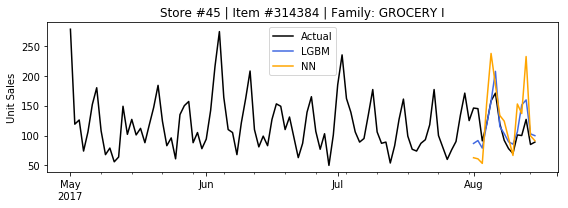

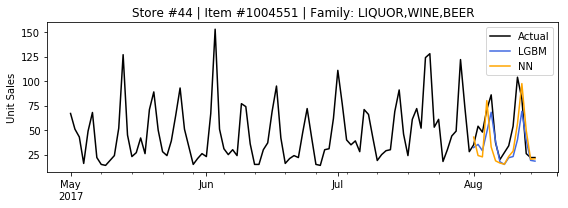

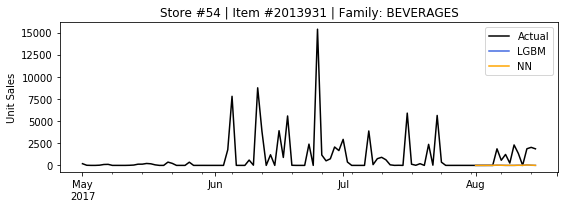

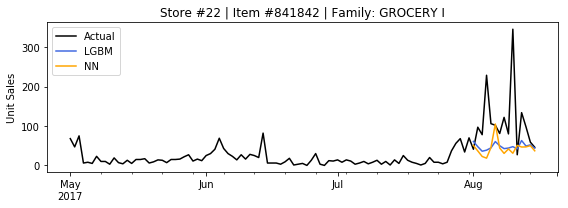

In [51]:
#store_item_list = [(44,314384),(45, 1004551),(54, 2013931),(22, 841842)]
store_item_list = [(45,314384),(44, 1004551),(54, 2013931),(22, 841842)]

for s, i in store_item_list:
    plt.figure(figsize=(8,3))
    item_prediction_plot(s, i)
    plt.tight_layout()
    plt.savefig(f'../presentation/store_{s}_item_{i}_pred.png')

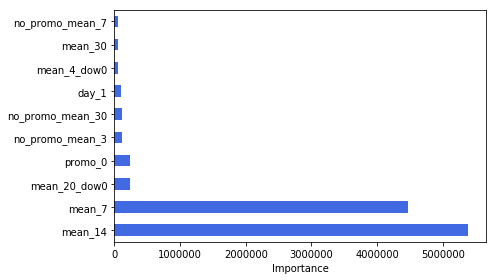

In [64]:
plt.figure(figsize=(7,4))
df_temp = feature_importance['2017-08-01'].sort_values(ascending=False)[:10]
df_temp.plot.barh(color='royalblue')
plt.xlabel('Importance')
plt.tight_layout()
plt.savefig(f'../presentation/feature_importance_day_1.png')

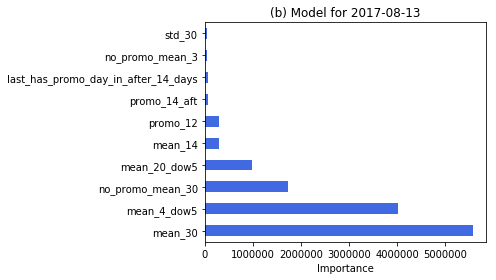

In [62]:
plt.figure(figsize=(7,4))
df_temp = feature_importance['2017-08-13'].sort_values(ascending=False)[:10]
df_temp.plot.barh(color='royalblue')
plt.xlabel('Importance')
plt.title('(b) Model for 2017-08-13')
plt.tight_layout()
plt.savefig(f'../presentation/feature_importance_day_13.png')